<a href="https://colab.research.google.com/github/pritam-banik-roy/Advanced-heart-Disease-analysis/blob/main/Heart_Disease_Analysis_EDA%2C_SDA%2C_and_Multivariate_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load and Explore Heart Disease_Dataset**

In [1]:
import pandas as pd

# Load dataset
file_path = "/content/heart.csv"
df = pd.read_csv(file_path)

In [2]:
# Check structure of dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
# Display first five rows
print("\nFirst 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### ***Data Cleaning***

In [6]:
# Check missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### **Check for duplicate rows**

In [7]:
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Duplicate Rows: 723

Unique values in sex: [1 0]

Unique values in cp: [0 1 2 3]

Unique values in fbs: [0 1]

Unique values in restecg: [1 0 2]

Unique values in exang: [0 1]

Unique values in slope: [2 0 1]

Unique values in ca: [2 0 1 3 4]

Unique values in thal: [3 2 1 0]

Unique values in target: [0 1]


# **📊 Step 2: Exploratory Data Analysis (EDA)**

### **Univariate Analysis**


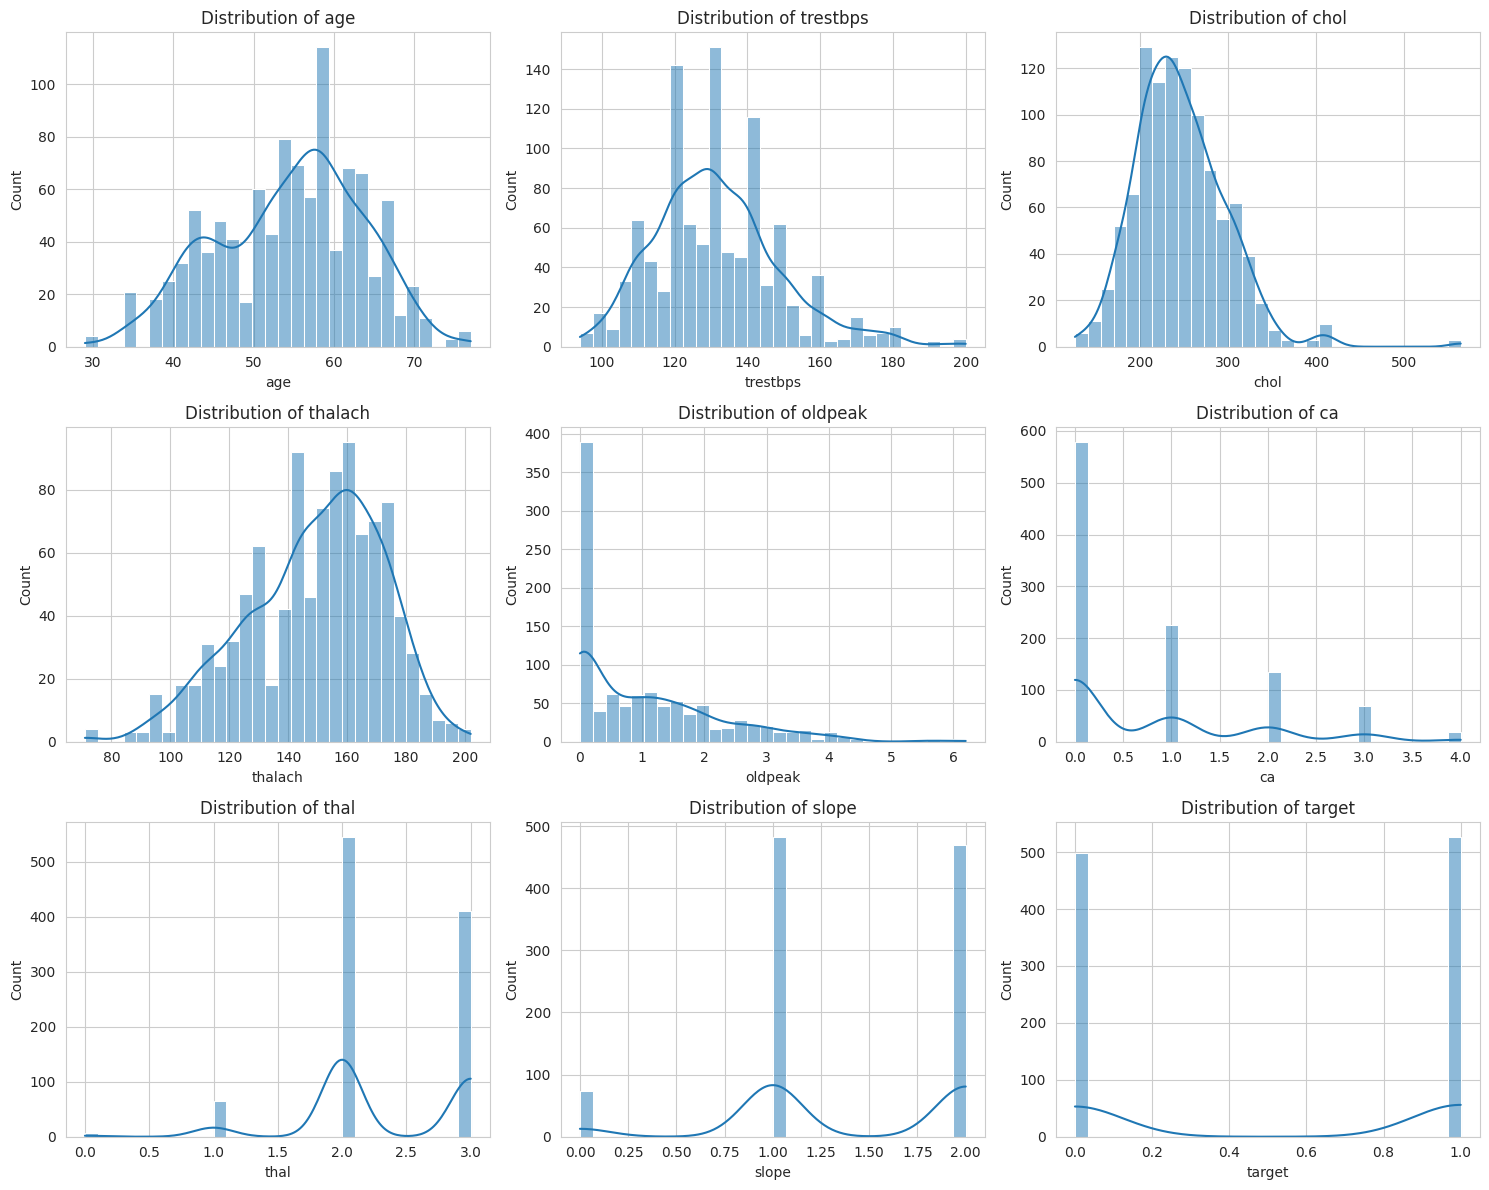

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# List of numerical columns
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'slope', 'target']

# Histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


### **Outlier Detection Using IQR**

In [9]:
# Detecting outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nOutlier Count Per Feature:")
print(outliers)



Outlier Count Per Feature:
age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64


### **Feature Relationship with Target**

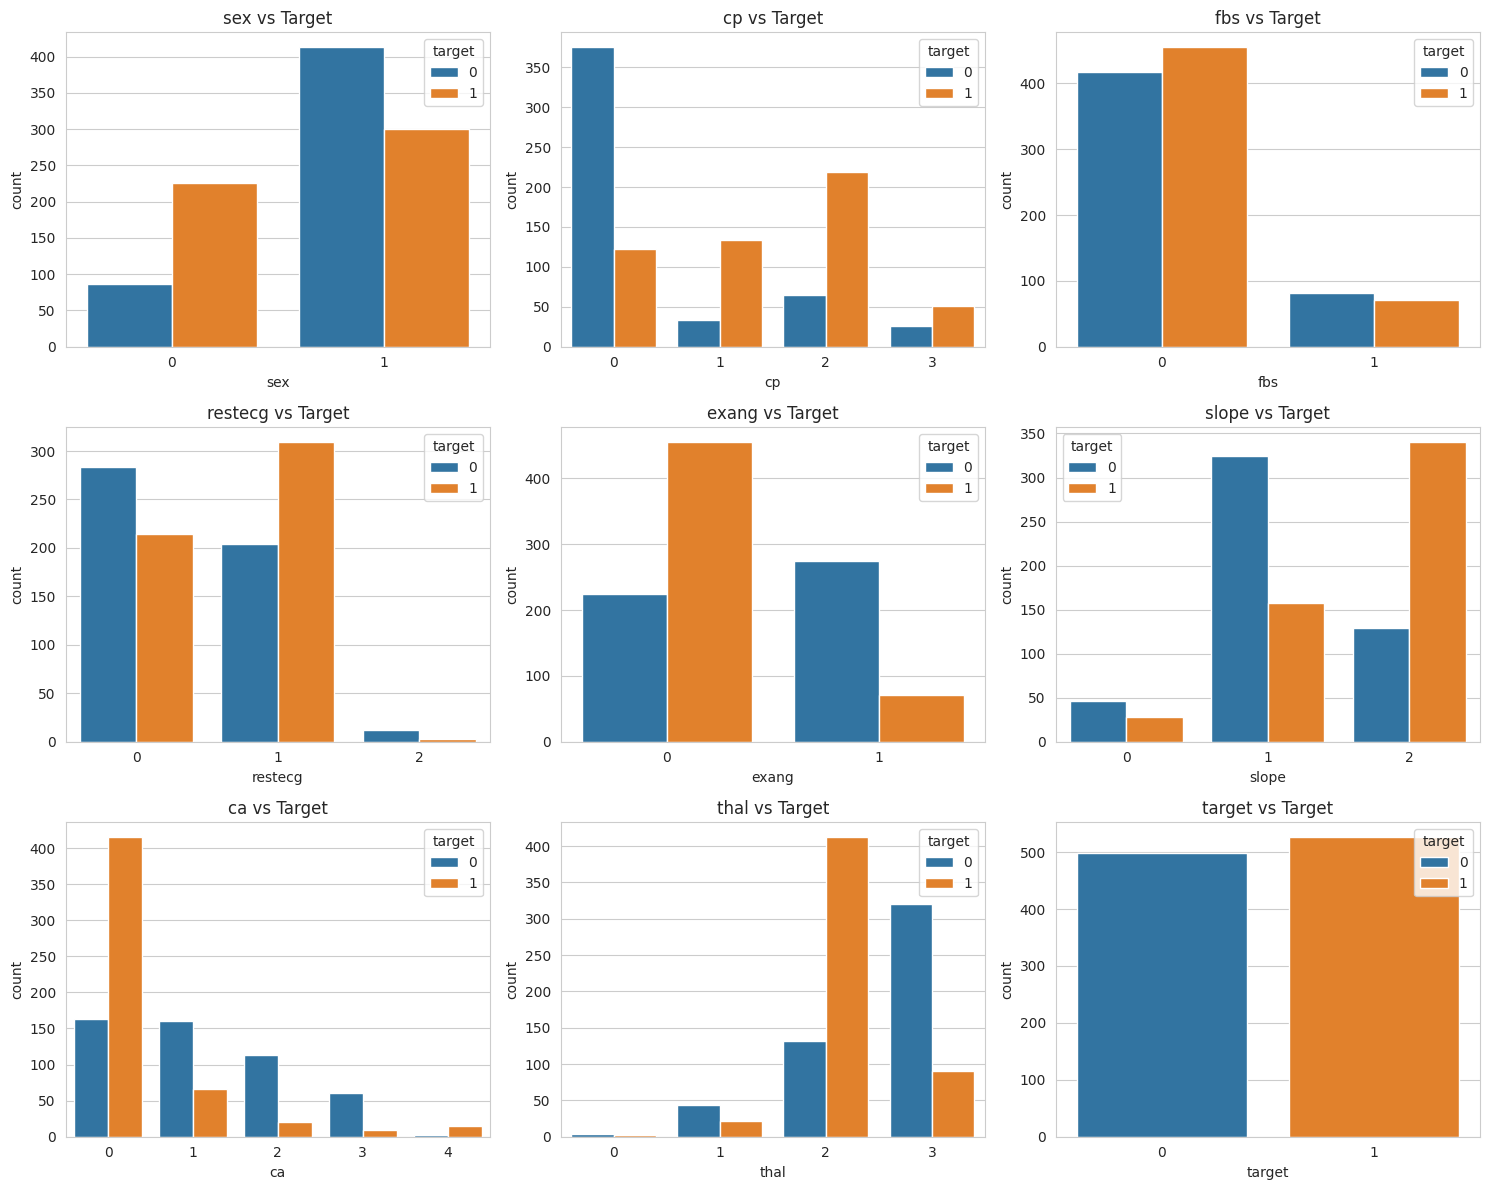

In [10]:
# Bar plots for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], hue=df['target'], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{col} vs Target")

plt.tight_layout()
plt.show()


# **Correlation Heatmap**

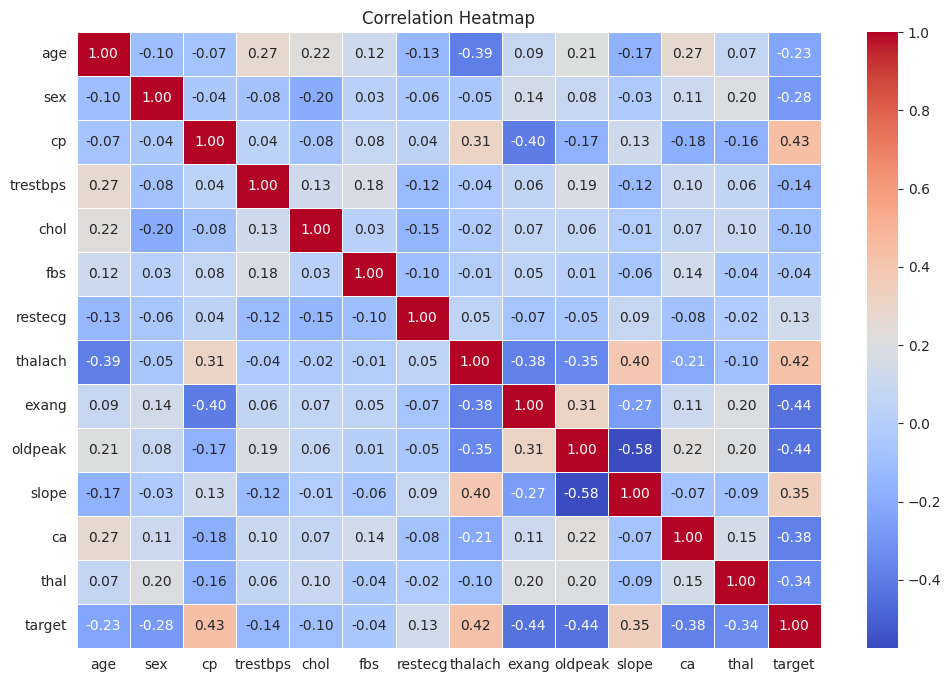

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### **Hypothesis Testing (T-test for chol between target groups)**

In [12]:
from scipy.stats import ttest_ind

# Separate groups
group_0 = df[df['target'] == 0]['chol']
group_1 = df[df['target'] == 1]['chol']

# Perform T-test
t_stat, p_value = ttest_ind(group_0, group_1)
print(f"T-test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Significant difference in cholesterol levels between heart disease and non-disease groups.")
else:
    print("No significant difference in cholesterol levels.")


T-test Results: t-statistic = 3.213, p-value = 0.00135
Significant difference in cholesterol levels between heart disease and non-disease groups.


### **Normality Check (Shapiro-Wilk Test)**

In [13]:
from scipy.stats import shapiro

stat, p = shapiro(df['chol'])
print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.5f}")

if p < 0.05:
    print("Cholesterol data is NOT normally distributed.")
else:
    print("Cholesterol data is normally distributed.")


Shapiro-Wilk Test: Statistic=0.950, p-value=0.00000
Cholesterol data is NOT normally distributed.


# **📊 Step 4: Multivariate EDA**

### **Pair Plot**

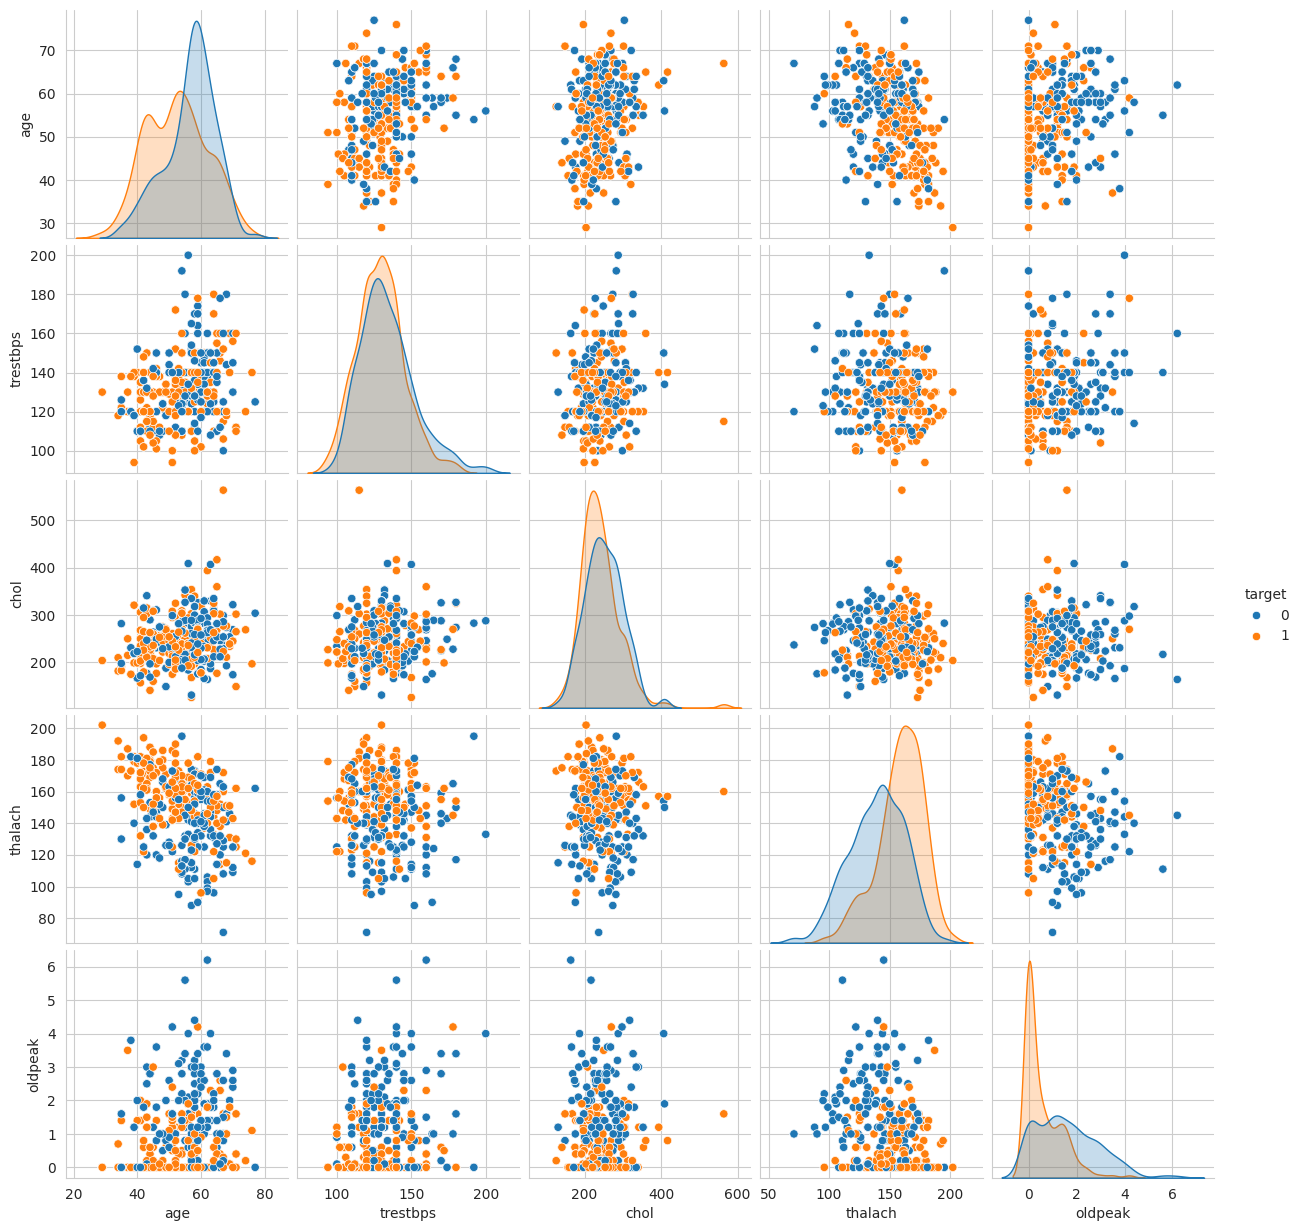

In [14]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()


### **Principal Component Analysis (PCA)**

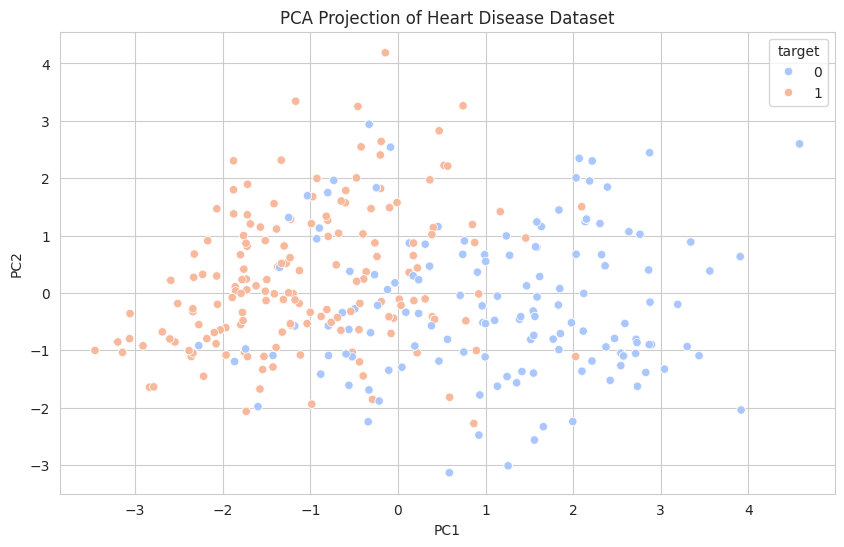

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['target']))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# Scatter plot of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['target'], palette="coolwarm")
plt.title("PCA Projection of Heart Disease Dataset")
plt.show()


# **Multidimensional Scaling (MDS)**

## ***Check Feasibility of Multidimensional Scaling!!!***

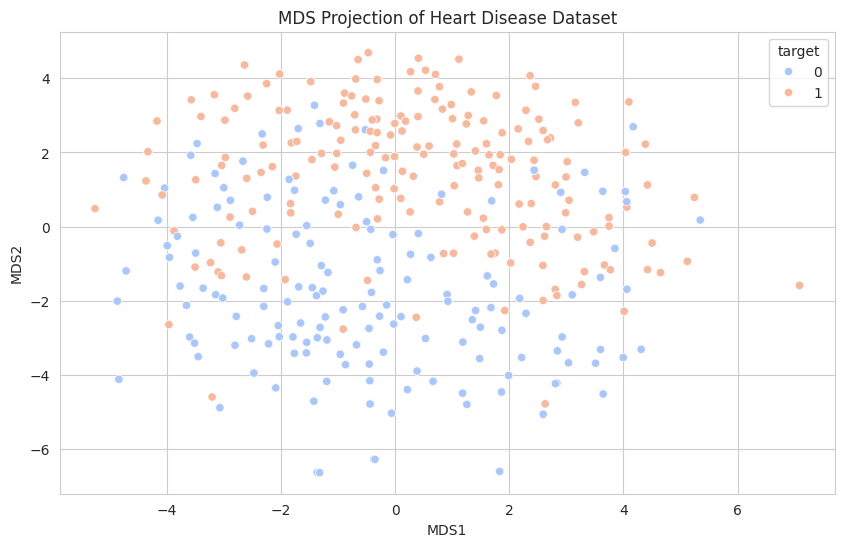

In [16]:
from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(scaled_data)

# Convert to DataFrame
df_mds = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'])
df_mds['target'] = df['target']

# Scatter plot of MDS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_mds['MDS1'], y=df_mds['MDS2'], hue=df_mds['target'], palette="coolwarm")
plt.title("MDS Projection of Heart Disease Dataset")
plt.show()


## ***K-Means Clustering***

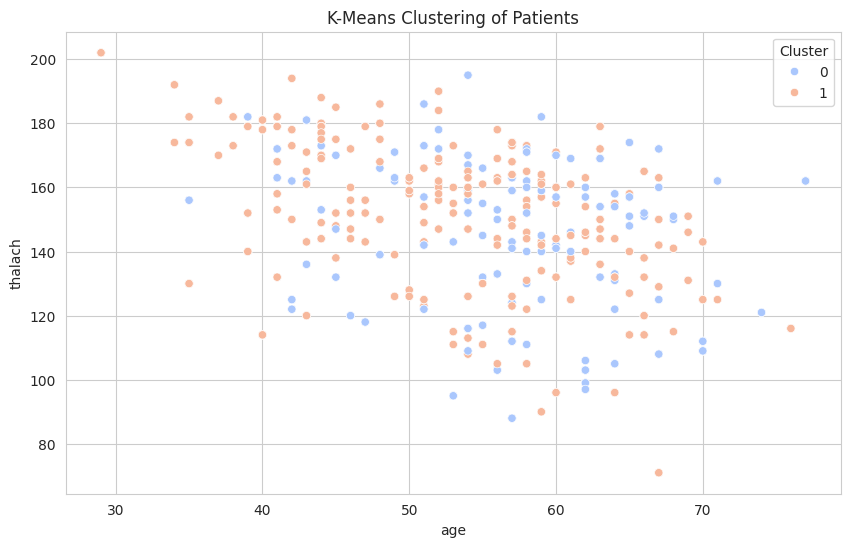

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

X = df.drop(columns=['target'])


# Create df_encoded if it doesn't exist and initialize 'Cluster' column

df_encoded = df.copy()
df_encoded['Cluster'] = kmeans.fit_predict(X)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['age'], y=df_encoded['thalach'], hue=df_encoded['Cluster'], palette="coolwarm")
plt.title("K-Means Clustering of Patients")
plt.show()

In [19]:
from sklearn.feature_selection import chi2
import numpy as np

# Apply Chi-Square Test
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

chi_scores, p_values = chi2(X, y)

# To display features
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'P-Value': p_values})
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)
print("\nTop Features based on Chi-Square Test:")
print(chi2_results.head(10))



Top Features based on Chi-Square Test:
     Feature  Chi2 Score        P-Value
7    thalach  650.008493  2.224662e-143
9    oldpeak  253.653461   4.149300e-57
2         cp  217.823922   2.698064e-49
11        ca  210.625919   1.003018e-47
8      exang  130.470927   3.232318e-30
4       chol  110.723364   6.803149e-26
0        age   81.425368   1.820066e-19
3   trestbps   45.974069   1.198287e-11
10     slope   33.673948   6.516763e-09
1        sex   24.373650   7.934661e-07


In [20]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display features
print("\nTop Features based on Mutual Information Score:")
print(mi_scores.head(10))


Top Features based on Mutual Information Score:
chol        0.263386
thalach     0.171609
ca          0.143205
oldpeak     0.139332
cp          0.134194
thal        0.126731
exang       0.118658
slope       0.088172
trestbps    0.076512
age         0.069323
dtype: float64


### ***Recursive Feature Elimination (RFE)***

In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("\nTop Selected Features from RFE:")
print(selected_features)



Top Selected Features from RFE:
Index(['age', 'cp', 'thalach', 'oldpeak', 'ca'], dtype='object')


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

copy_df = df.copy(deep=True)

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
numerical_data = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for i in numerical_data:
    # Applying Min-Max Scaler
    min_max_scaled_data = min_max_scaler.fit_transform(copy_df[[i]])

    # Applying Standard Scaler
    standard_scaled_data = standard_scaler.fit_transform(min_max_scaled_data)

    # Flatten the array and assigned back to the dataframe
    copy_df[i] = standard_scaled_data.flatten()

copy_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , ]

# OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False)

# Transform the categorical columns and create a DataFrame
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_columns]),
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original numerical columns with the encoded categorical columns
final_df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

(final_df)

X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
(final_df)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53,140,203,155,3.1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70,145,174,125,2.6,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61,148,203,161,0.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,138,294,106,1.9,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,60,125,258,141,2.8,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,47,110,275,118,1.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,50,110,254,159,0.0,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [30]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [35]:
import time
from sklearn.model_selection import cross_validate

results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time.time()
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time.time()

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])

    elapsed_time = end_time - start_time

    # Store the results in the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,

        "Time (s)": elapsed_time
    })

    print(f"{name} completed in {elapsed_time:.4f} seconds.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression completed in 0.7869 seconds.
Random Forest completed in 3.0703 seconds.
SVM completed in 3.0487 seconds.
Decision Tree completed in 0.6129 seconds.
KNN completed in 0.6021 seconds.
Naive Bayes completed in 0.3445 seconds.
Gradient Boosting completed in 4.1383 seconds.
AdaBoost completed in 1.5891 seconds.
Bagging Classifier completed in 0.6647 seconds.
MLP Classifier completed in 8.7004 seconds.


In [36]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)

In [37]:
# Sort by Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [38]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,Time (s)
1,Random Forest,0.969279,0.965712,0.976035,0.970823,3.070338
3,Decision Tree,0.967900,0.966103,0.973404,0.969600,0.612896
8,Bagging Classifier,0.945629,0.948642,0.949684,0.948795,0.664666
6,Gradient Boosting,0.944231,0.937015,0.960105,0.947950,4.138298
0,Logistic Regression,0.875874,0.877283,0.888667,0.882770,0.786863
9,MLP Classifier,0.874476,0.869272,0.896632,0.882251,8.700406
7,AdaBoost,0.873087,0.874725,0.885930,0.880159,1.589108
5,Naive Bayes,0.820066,0.788132,0.899158,0.839707,0.344501
4,KNN,0.715491,0.742234,0.705579,0.723042,0.602146
2,SVM,0.688957,0.674966,0.787825,0.726728,3.048719


<ipython-input-39-bcd14d3e7e9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


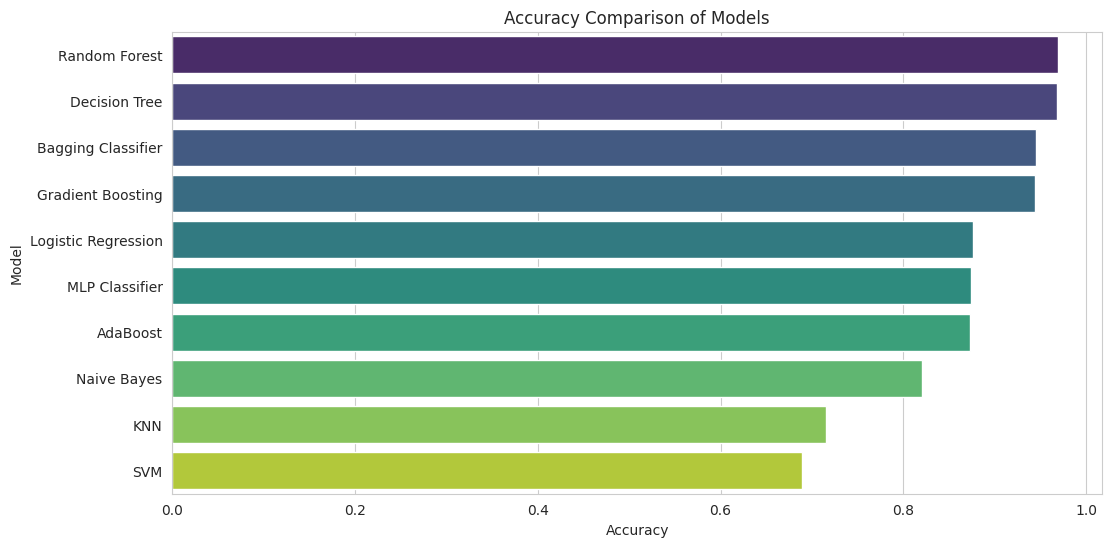

In [39]:
# Plot the model accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

<ipython-input-40-54a2b48d9ac6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")


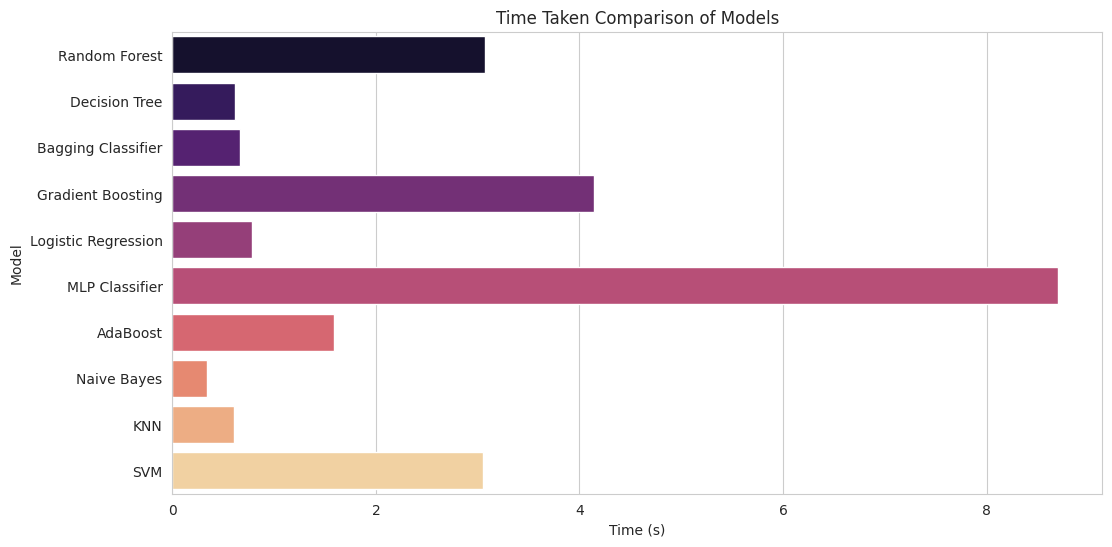

In [40]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

In [44]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [45]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9735


In [47]:
# Evaluating on the test set
from sklearn.metrics import accuracy_score
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test Accuracy after tuning: 0.9805


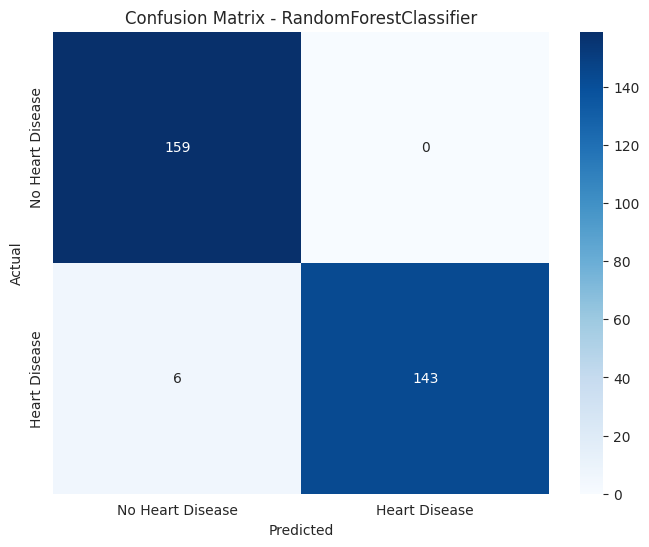

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ***Correlation Metrics Analysis***

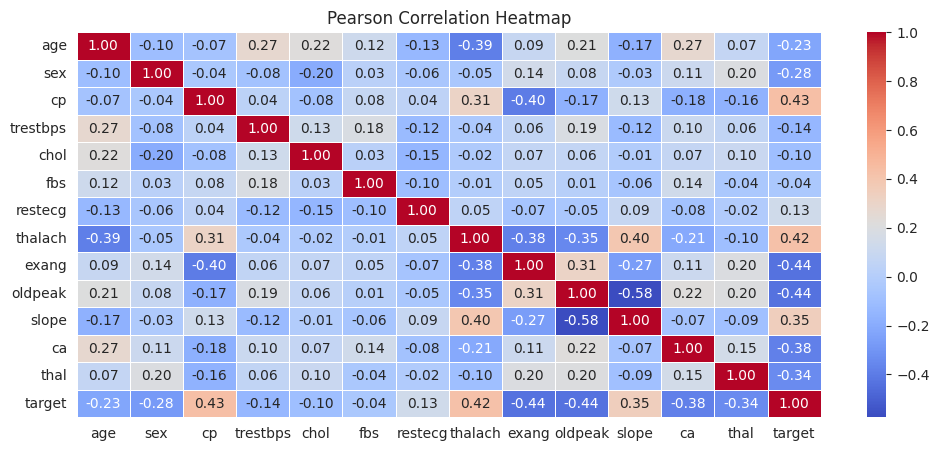

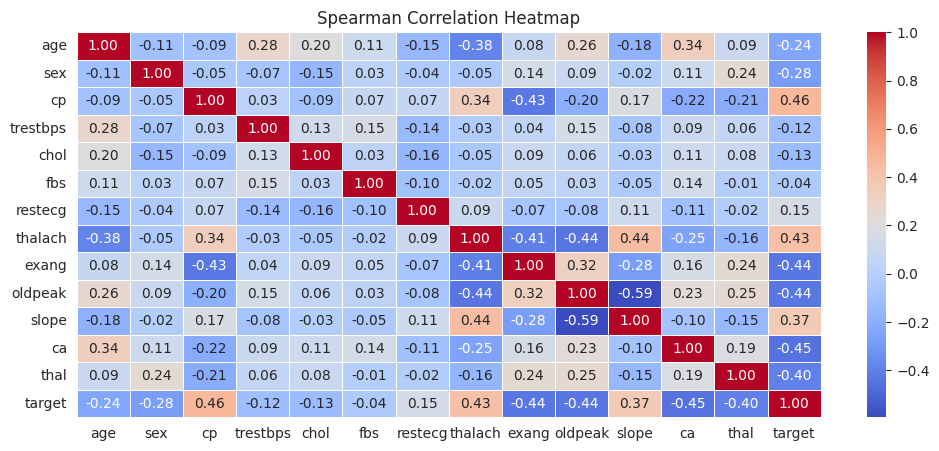

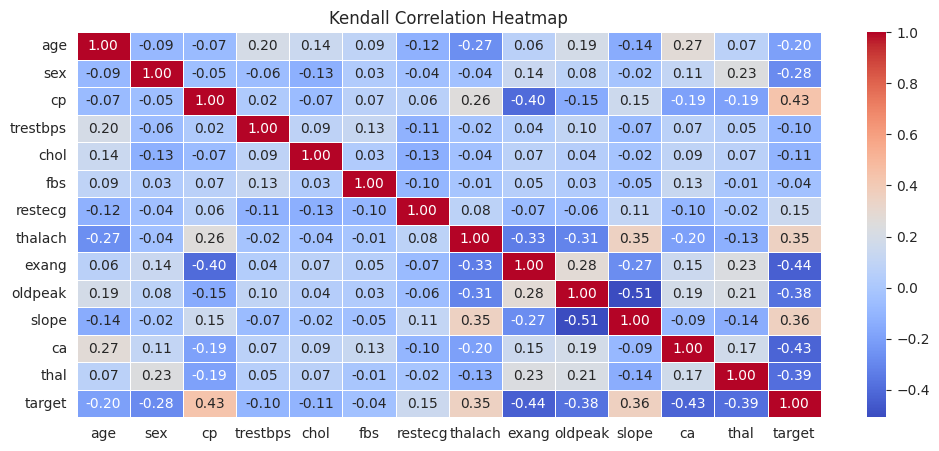


Variance Inflation Factor (VIF) Scores:
     Feature        VIF
0        age  38.699830
1        sex   3.613725
2         cp   2.376553
3   trestbps  57.953085
4       chol  26.185961
5        fbs   1.272029
6    restecg   2.052366
7    thalach  42.598372
8      exang   2.073879
9    oldpeak   3.117289
10     slope   9.854424
11        ca   1.830705
12      thal  16.724068


In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute Pearson, Spearman, and Kendall correlation
correlations = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Plot heatmaps
plt.figure(figsize=(12, 5))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(kendall_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kendall Correlation Heatmap")
plt.show()

# Calculate Variance Inflation Factor (VIF)
X = df.drop(columns=['target'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF) Scores:")
print(vif_data)


# **Developing a neural network**

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
categorical_cols = ['cp', 'thal', 'slope']
encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = encoders[col].fit_transform(df[col])

# Standardize numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare input data
X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define embedding layers
inputs = []
embeddings = []

for col in categorical_cols:
    input_layer = Input(shape=(1,), name=f"input_{col}")
    embedding_layer = Embedding(input_dim=df[col].nunique() + 1, output_dim=3, input_length=1)(input_layer)
    embeddings.append(Flatten()(embedding_layer))
    inputs.append(input_layer)

# Add numerical inputs
numerical_input = Input(shape=(len(numerical_cols),), name="numerical_input")
inputs.append(numerical_input)

# Combine embeddings and numerical features
merged = Concatenate()(embeddings + [numerical_input])

# Neural network layers
dense1 = Dense(64, activation="relu")(merged)
dense2 = Dense(32, activation="relu")(dense1)
output = Dense(1, activation="sigmoid")(dense2)

# Define the model
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

# Convert categorical data for training
X_train_inputs = [X_train[col] for col in categorical_cols] + [X_train[numerical_cols].values]
X_test_inputs = [X_test[col] for col in categorical_cols] + [X_test[numerical_cols].values]

# Train the model
model.fit(X_train_inputs, y_train, epochs=20, batch_size=16, validation_data=(X_test_inputs, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_cp (InputLayer)     │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_thal (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_slope (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 3)           │             15 │ input_cp[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 3)           │             15 │ input_thal[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 3)           │             12 │ input_slope[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3)              │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 3)              │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 3)              │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 14)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0],       │
│                           │                        │                │ numerical_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            960 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             33 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,115 (12.17 KB)

 Trainable params: 3,115 (12.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5853 - loss: 0.6552 - val_accuracy: 0.6780 - val_loss: 0.5616
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7578 - loss: 0.4995 - val_accuracy: 0.7171 - val_loss: 0.5348
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.4609 - val_accuracy: 0.7220 - val_loss: 0.5024
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.4080 - val_accuracy: 0.7805 - val_loss: 0.4581
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.3513 - val_accuracy: 0.8000 - val_loss: 0.4363
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8397 - loss: 0.3507 - val_accuracy: 0.8049 - val_loss: 0.4267
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8618 - loss: 0.3310 - val_accuracy: 0.8049 - val_loss: 0.4208
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8637 - loss: 0.3106 - val_accuracy: 0.8000 - val_loss